# Первая часть. Исследование

Ссылка на соревнование https://www.kaggle.com/c/advanced-dls-spring-2021

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Загрузка данных
1) Посмотрим на первые пять строчек. 

2) Проверим, есть ли в датасете незаполненные значения.

In [3]:
data_default = pd.read_csv('./train.csv')

In [4]:
data = data_default
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [6]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

На первый взгляд, пропущенных значений не наблюдается

In [8]:
for col in num_cols:
    print (col, type(data[col][0]))

ClientPeriod <class 'numpy.int64'>
MonthlySpending <class 'numpy.float64'>
TotalSpent <class 'str'>


В столбце TotalSpent данные представлены в строковом формате. Надо перевести их в числовой формат. Для этого заменим пустые значения на 0.

In [10]:
data['TotalSpent'] = data['TotalSpent'].str.replace(' ', '0')

In [11]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

Также для наглядности переведем значения 0/1 из столбца IsSeniorCitizen в значения Yes/No

In [13]:
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].astype(str)
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].replace('0', 'No').replace('1', 'Yes')

In [14]:
data['IsSeniorCitizen']

0        No
1        No
2        No
3       Yes
4        No
       ... 
5277     No
5278     No
5279     No
5280     No
5281     No
Name: IsSeniorCitizen, Length: 5282, dtype: object

## Анализ данных


In [15]:
import seaborn as sns
sns.set()

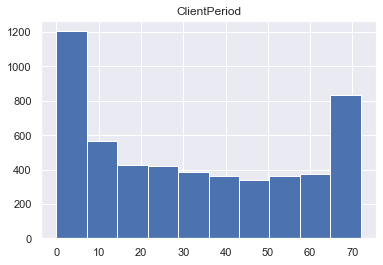

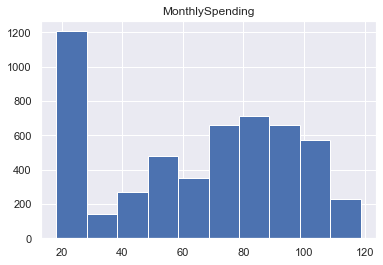

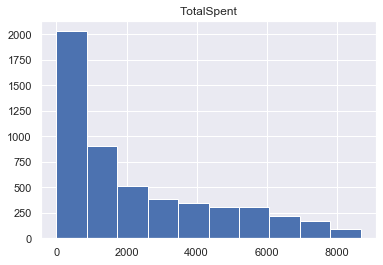

In [16]:
for i in num_cols:
    plt.title(i)
    plt.hist(data[i])
    plt.show()

In [17]:
print(len(cat_cols))

16


In [18]:
data[cat_cols[0]].value_counts().index

Index(['Male', 'Female'], dtype='object')

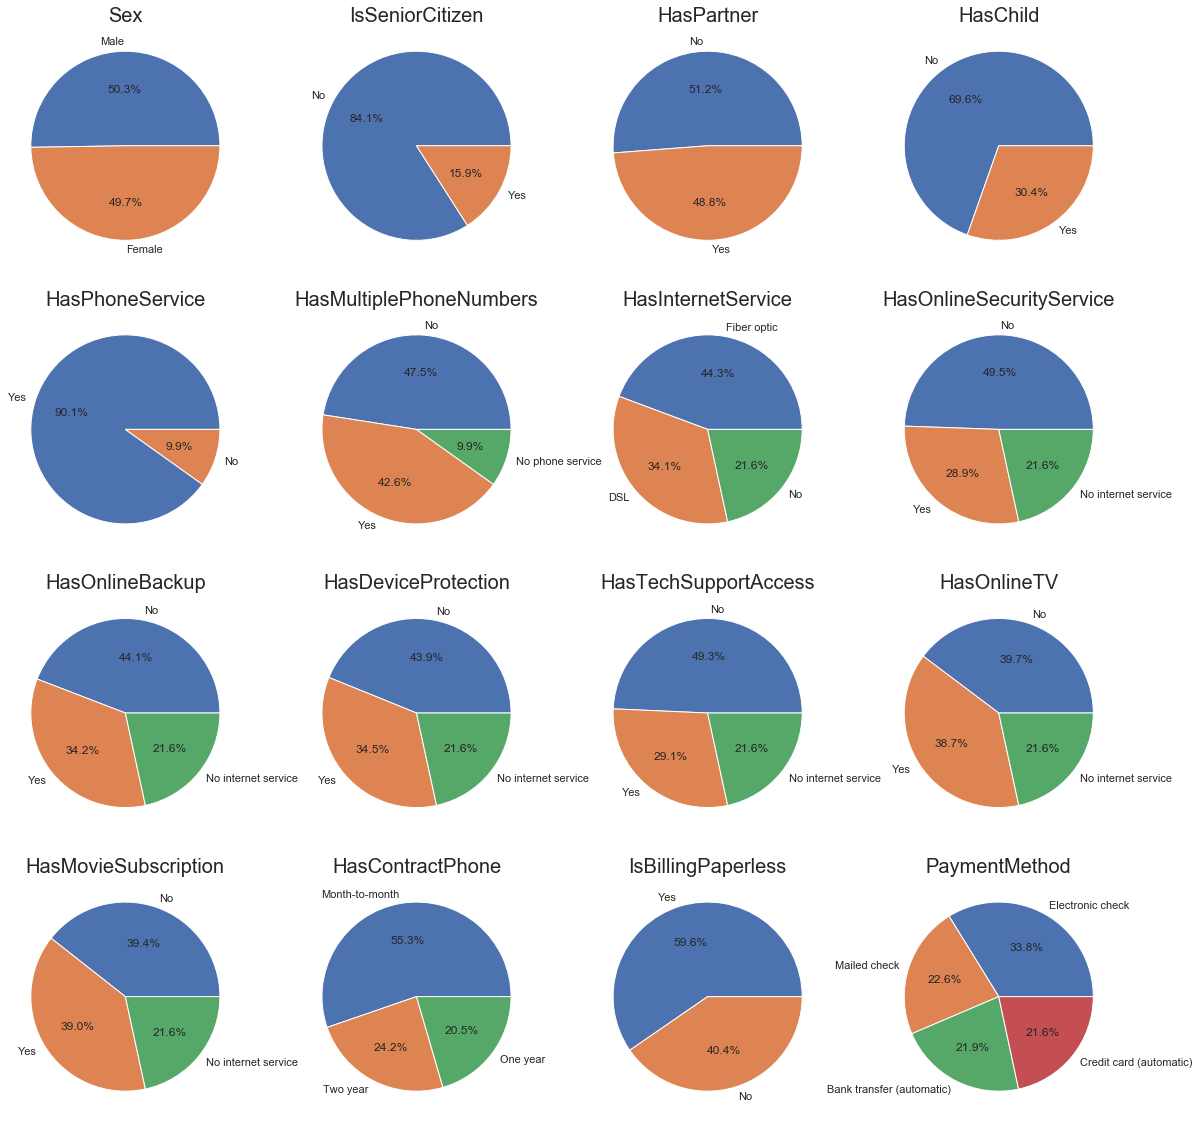

In [19]:
fig, ax = plt.subplots(4, 4, figsize=(20,20))
for i in range(16):
    diagram = data[cat_cols[i]].value_counts()
    labels = data[cat_cols[i]].value_counts().index
    ax[i//4, i%4].set_title(cat_cols[i], fontsize=20)
    ax[i//4, i%4].pie(diagram, labels = labels, autopct = '%1.1f%%')

In [20]:
data.groupby('Churn').describe()

ClientPeriod                                                     \
             count       mean        std  min   25%   50%   75%   max   
Churn                                                                   
0           3898.0  37.525911  24.123750  0.0  15.0  37.0  61.0  72.0   
1           1384.0  17.951590  19.460135  1.0   2.0  10.0  29.0  72.0   

      MonthlySpending             ...               TotalSpent               \
                count       mean  ...   75%     max      count         mean   
Churn                             ...                                         
0              3898.0  61.602719  ...  89.1  118.75     3898.0  2557.914469   
1              1384.0  74.281178  ...  94.2  118.35     1384.0  1525.831864   

                                                                
               std   min       25%       50%      75%      max  
Churn                                                           
0      2332.736235   0.0  564.4625  1709.125  4273.60  8672.45  
1      1881.443058  19.1  134.6500   706.725  2352.55  8684.80  

[2 rows x 24 columns]

Классы не очень хорошо сбланасированы, одного класса почти в 3 раза больше, чем другого

## Применение линейных моделей

In [22]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Проведем кодирование категориальных признаков

In [23]:
data = pd.get_dummies(data)
data

,ClientPeriod,MonthlySpending,TotalSpent,Churn,Sex_Female,Sex_Male,IsSeniorCitizen_No,IsSeniorCitizen_Yes,HasPartner_No,HasPartner_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5278,50,44.45,2188.45,0,0,1,1,0,0,1,...,0,0,1,0,0,1,1,0,0,0
5279,1,55.05,55.05,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
5280,29,76.00,2215.25,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


Чтобы избежать утечек данных из тренировочной выборки в тестовую, разделим датасет и только после отнормируем

In [24]:
y = data['Churn']
X = data.drop(columns = ['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Тренировочная выборка:', X_train.shape)
print('Тестовая выборка:', X_test.shape)

Тренировочная выборка: (3697, 46)
Тестовая выборка: (1585, 46)


Отнормируем наши признаки, обучив модель масштабирования на тренировочной выборке

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
Log_clf = LogisticRegressionCV(scoring = 'roc_auc', cv = 5, refit = True).fit(X_train, y_train)

In [27]:
model_clf = Log_clf.fit(X_train, y_train)
prediction_proba = model_clf.predict_proba(X_test)

In [28]:
print('Лучший параметр С:', model_clf.get_params())
print('Roc_auc:', roc_auc_score(y_test, prediction_proba[:, 1]))

Лучший параметр С: {'Cs': 10, 'class_weight': None, 'cv': 5, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': 'roc_auc', 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}
Roc_auc: 0.8315307662072551


In [29]:
""""Лучший параметр С: {'Cs': 10, 'class_weight': None, 'cv': 5, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': 'roc_auc', 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}
Roc_auc: 0.8315307662072551"""

'"Лучший параметр С: {\'Cs\': 10, \'class_weight\': None, \'cv\': 5, \'dual\': False, \'fit_intercept\': True, \'intercept_scaling\': 1.0, \'l1_ratios\': None, \'max_iter\': 100, \'multi_class\': \'auto\', \'n_jobs\': None, \'penalty\': \'l2\', \'random_state\': None, \'refit\': True, \'scoring\': \'roc_auc\', \'solver\': \'lbfgs\', \'tol\': 0.0001, \'verbose\': 0}\nRoc_auc: 0.8315307662072551'

## Применение градиентного бустинга

In [31]:
import catboost

In [32]:
y = data_default['Churn']
X = data_default.drop(columns = ['Churn'])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [34]:
model_boost = catboost.CatBoostClassifier(cat_features=cat_cols)

In [35]:
clf_boost = model_boost.fit(X_train, y_train)

Learning rate set to 0.018006
0:	learn: 0.6823737	total: 207ms	remaining: 3m 27s
1:	learn: 0.6736116	total: 225ms	remaining: 1m 52s
2:	learn: 0.6617305	total: 249ms	remaining: 1m 22s
3:	learn: 0.6507038	total: 279ms	remaining: 1m 9s
4:	learn: 0.6410056	total: 293ms	remaining: 58.2s
5:	learn: 0.6308360	total: 310ms	remaining: 51.4s
6:	learn: 0.6211123	total: 326ms	remaining: 46.3s
7:	learn: 0.6116528	total: 342ms	remaining: 42.4s
8:	learn: 0.6041454	total: 352ms	remaining: 38.8s
9:	learn: 0.5960324	total: 365ms	remaining: 36.2s
10:	learn: 0.5887124	total: 381ms	remaining: 34.2s
11:	learn: 0.5824347	total: 388ms	remaining: 31.9s
12:	learn: 0.5751987	total: 405ms	remaining: 30.7s
13:	learn: 0.5695327	total: 414ms	remaining: 29.1s
14:	learn: 0.5630314	total: 432ms	remaining: 28.4s
15:	learn: 0.5579403	total: 442ms	remaining: 27.2s
16:	learn: 0.5522154	total: 461ms	remaining: 26.7s
17:	learn: 0.5462229	total: 480ms	remaining: 26.2s
18:	learn: 0.5403104	total: 526ms	remaining: 27.2s
19:	lear

In [36]:
predict_proba_boost = model_boost.predict_proba(X_test)
print (roc_auc_score(y_test, predict_proba_boost[:, 1]))

0.8317093323528044


In [37]:
"""Видим, что лучшая модель получилась при параметрах {'params': {'iterations': 500, 'learning_rate': 0.3},"""

"Видим, что лучшая модель получилась при параметрах {'params': {'iterations': 500, 'learning_rate': 0.3},"

In [38]:
best_boosting_model = catboost.CatBoostClassifier(iterations = 40, learning_rate = 0.2, cat_features=cat_cols)
best_boosting_model.fit(X_train, y_train)
best_boosting_clf_prediction_proba = best_boosting_model.predict_proba(X_test)
print(roc_auc_score(y_test, best_boosting_clf_prediction_proba[:,1]))

0:	learn: 0.6247355	total: 18.6ms	remaining: 725ms
1:	learn: 0.5769274	total: 51.7ms	remaining: 983ms
2:	learn: 0.5422844	total: 67.7ms	remaining: 835ms
3:	learn: 0.5163396	total: 81.9ms	remaining: 737ms
4:	learn: 0.4967637	total: 97.3ms	remaining: 681ms
5:	learn: 0.4805660	total: 115ms	remaining: 652ms
6:	learn: 0.4664197	total: 146ms	remaining: 690ms
7:	learn: 0.4547123	total: 159ms	remaining: 637ms
8:	learn: 0.4461618	total: 168ms	remaining: 579ms
9:	learn: 0.4370758	total: 183ms	remaining: 550ms
10:	learn: 0.4296063	total: 198ms	remaining: 523ms
11:	learn: 0.4232496	total: 216ms	remaining: 504ms
12:	learn: 0.4187408	total: 234ms	remaining: 485ms
13:	learn: 0.4159493	total: 240ms	remaining: 445ms
14:	learn: 0.4115706	total: 259ms	remaining: 432ms
15:	learn: 0.4079897	total: 289ms	remaining: 434ms
16:	learn: 0.4058296	total: 303ms	remaining: 411ms
17:	learn: 0.4027632	total: 318ms	remaining: 388ms
18:	learn: 0.4004619	total: 332ms	remaining: 367ms
19:	learn: 0.3985682	total: 348ms	re

In [39]:
best_boosting_model = catboost.CatBoostClassifier(iterations = 50, learning_rate = 0.4, cat_features=cat_cols)
best_boosting_model.fit(X_train, y_train)
best_boosting_clf_prediction_proba = best_boosting_model.predict_proba(X_test)
print(roc_auc_score(y_test, best_boosting_clf_prediction_proba[:,1]))

0:	learn: 0.5704987	total: 12ms	remaining: 590ms
1:	learn: 0.5101009	total: 25.8ms	remaining: 618ms
2:	learn: 0.4760596	total: 29.7ms	remaining: 466ms
3:	learn: 0.4505753	total: 41.6ms	remaining: 479ms
4:	learn: 0.4332910	total: 54.4ms	remaining: 490ms
5:	learn: 0.4219094	total: 67ms	remaining: 491ms
6:	learn: 0.4136288	total: 79.6ms	remaining: 489ms
7:	learn: 0.4107862	total: 84.5ms	remaining: 444ms
8:	learn: 0.4058544	total: 96.9ms	remaining: 441ms
9:	learn: 0.4046112	total: 101ms	remaining: 406ms
10:	learn: 0.4014240	total: 114ms	remaining: 402ms
11:	learn: 0.3979111	total: 126ms	remaining: 398ms
12:	learn: 0.3953474	total: 138ms	remaining: 394ms
13:	learn: 0.3937280	total: 152ms	remaining: 392ms
14:	learn: 0.3901327	total: 166ms	remaining: 386ms
15:	learn: 0.3868633	total: 180ms	remaining: 383ms
16:	learn: 0.3866161	total: 190ms	remaining: 368ms
17:	learn: 0.3852180	total: 204ms	remaining: 362ms
18:	learn: 0.3830877	total: 218ms	remaining: 356ms
19:	learn: 0.3814876	total: 234ms	re

In [40]:
best_boosting_model = catboost.CatBoostClassifier(iterations = 100, learning_rate = 0.35, cat_features=cat_cols)
best_boosting_model.fit(X_train, y_train)
best_boosting_clf_prediction_proba = best_boosting_model.predict_proba(X_test)
print(roc_auc_score(y_test, best_boosting_clf_prediction_proba[:,1]))

0:	learn: 0.5827693	total: 12.8ms	remaining: 1.26s
1:	learn: 0.5222564	total: 26.5ms	remaining: 1.3s
2:	learn: 0.4871548	total: 30.2ms	remaining: 976ms
3:	learn: 0.4650071	total: 38ms	remaining: 912ms
4:	learn: 0.4463894	total: 50.1ms	remaining: 953ms
5:	learn: 0.4318120	total: 62.4ms	remaining: 978ms
6:	learn: 0.4225844	total: 74.3ms	remaining: 987ms
7:	learn: 0.4152428	total: 95.2ms	remaining: 1.09s
8:	learn: 0.4091214	total: 107ms	remaining: 1.08s
9:	learn: 0.4066724	total: 119ms	remaining: 1.07s
10:	learn: 0.4029651	total: 131ms	remaining: 1.06s
11:	learn: 0.4007385	total: 143ms	remaining: 1.04s
12:	learn: 0.3981155	total: 155ms	remaining: 1.03s
13:	learn: 0.3958855	total: 170ms	remaining: 1.04s
14:	learn: 0.3941682	total: 184ms	remaining: 1.04s
15:	learn: 0.3933444	total: 198ms	remaining: 1.04s
16:	learn: 0.3924585	total: 213ms	remaining: 1.04s
17:	learn: 0.3920647	total: 228ms	remaining: 1.04s
18:	learn: 0.3909889	total: 244ms	remaining: 1.04s
19:	learn: 0.3909692	total: 250ms	re

In [41]:
best_boosting_model = catboost.CatBoostClassifier(iterations = 20, learning_rate = 0.4, cat_features=cat_cols)
best_boosting_model.fit(X_train, y_train)
best_boosting_clf_prediction_proba = best_boosting_model.predict_proba(X_test)
print(roc_auc_score(y_test, best_boosting_clf_prediction_proba[:,1]))

0:	learn: 0.5704987	total: 16.7ms	remaining: 317ms
1:	learn: 0.5101009	total: 31.6ms	remaining: 284ms
2:	learn: 0.4760596	total: 35.5ms	remaining: 201ms
3:	learn: 0.4505753	total: 50.2ms	remaining: 201ms
4:	learn: 0.4332910	total: 64ms	remaining: 192ms
5:	learn: 0.4219094	total: 76.2ms	remaining: 178ms
6:	learn: 0.4136288	total: 88.9ms	remaining: 165ms
7:	learn: 0.4107862	total: 93.9ms	remaining: 141ms
8:	learn: 0.4058544	total: 106ms	remaining: 129ms
9:	learn: 0.4046112	total: 111ms	remaining: 111ms
10:	learn: 0.4014240	total: 122ms	remaining: 100ms
11:	learn: 0.3979111	total: 136ms	remaining: 90.8ms
12:	learn: 0.3953474	total: 152ms	remaining: 81.7ms
13:	learn: 0.3937280	total: 177ms	remaining: 75.7ms
14:	learn: 0.3901327	total: 196ms	remaining: 65.3ms
15:	learn: 0.3868633	total: 216ms	remaining: 54ms
16:	learn: 0.3866161	total: 228ms	remaining: 40.2ms
17:	learn: 0.3852180	total: 244ms	remaining: 27.1ms
18:	learn: 0.3830877	total: 257ms	remaining: 13.5ms
19:	learn: 0.3814876	total: 2

Лучшее значение на кроссвалидации получилось 0.8341363526860996

# Предсказания для сабмита

In [43]:
best_model = best_boosting_model

In [44]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv', )
submission.drop(columns = ['Id'])

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission = submission.set_index('Id', drop = True)
submission.to_csv('./my_submission2.csv')